<a href="https://colab.research.google.com/github/shriver42/ESAA/blob/%EC%97%B0%EC%8A%B5-%EB%AC%B8%EC%A0%9C/YB_3_22_%EC%84%B8%EC%85%98_%EB%AC%B8%EC%A0%9C_chipotle_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

In [57]:
from urllib.request import urlopen
data = urlopen('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv').read()

### Step 3. Assign it to a variable called chipo.

In [58]:
from io import BytesIO
chipo = pd.read_csv(BytesIO(data),'\t')

<ipython-input-58-097a4499f1f9>:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  chipo = pd.read_csv(BytesIO(data),'\t')


### Step 4. See the first 10 entries

In [59]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

Text(0.5, 1.0, 'Top 5 tiems bought')

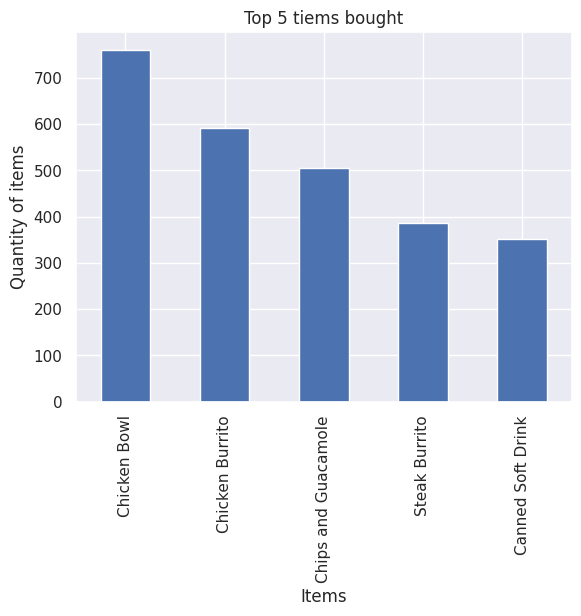

In [60]:
import seaborn as sns
chipo_m = chipo.groupby('item_name').quantity.sum().sort_values(ascending=False)[0:5]
chipo_m
chipo_m.plot(kind='bar')

plt.ylabel('Quantity of items')
plt.xlabel('Items')
plt.title('Top 5 tiems bought')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

<Axes: xlabel='item_price', ylabel='quantity'>

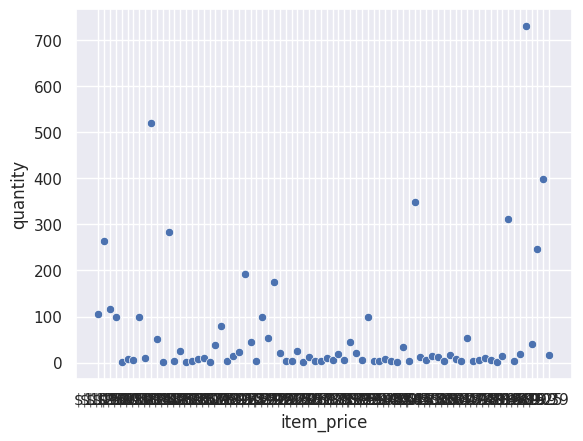

In [61]:
import seaborn as sns
sns.set()
chipo_t = chipo.groupby('item_price').quantity.sum()
chipo_t = pd.DataFrame(chipo_t)
sns.scatterplot(x='item_price',y='quantity',data=chipo_t)

### Step 7. BONUS: Create a question and a graph to answer your own question.

<Axes: xlabel='order_id'>

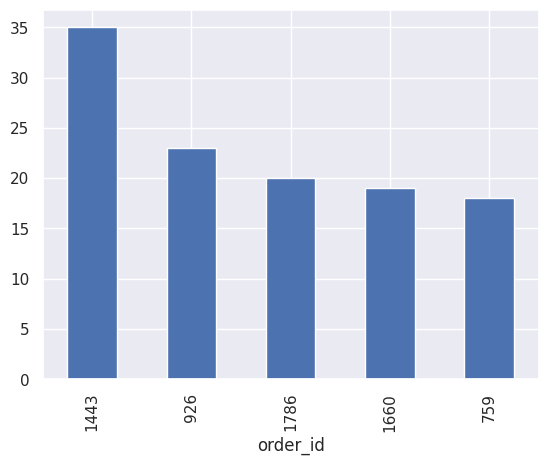

In [62]:
#가장 많은 물건을 시킨 주문자는 누구인가?

chipo_o = chipo.groupby('order_id').quantity.sum().sort_values(ascending=False)[0:5]
chipo_o.plot(kind='bar')